# Load Data dan menampilkan isi data

In [333]:
# Standard Dependencies
import os
import numpy as np
import pandas as pd
from math import sqrt

# Visualization
from pylab import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from statistics import median
from scipy import signal
from math import factorial
import scipy.stats as stats
from scipy.stats import sem, binom, lognorm, poisson, bernoulli, spearmanr
from scipy.fftpack import fft, fftshift

# Scikit-learn for Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Seed for reproducability
seed = 12345
np.random.seed(seed)


In [334]:
import pandas as pd
import numpy as np
import gdown

url = "https://drive.google.com/uc?id=1eoOjwiH4hCpqvGEt-dUUT9mzsT-2UG35"
output_file = "insurance.csv"
# Unduh file csv
gdown.download(url, output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1eoOjwiH4hCpqvGEt-dUUT9mzsT-2UG35
To: /content/insurance.csv
100%|██████████| 55.6k/55.6k [00:00<00:00, 29.9MB/s]


'insurance.csv'

In [335]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
df = pd.read_csv(output_file)

# Menampilkan info dan describe data
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(1338, 7)

In [336]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [337]:
# Mengecek missing value dalam DataFrame
missing_values = df.isnull().sum()

# Menampilkan jumlah missing value tiap kolom
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


tidak terdapat missing value, data siap digunakan

In [338]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Age

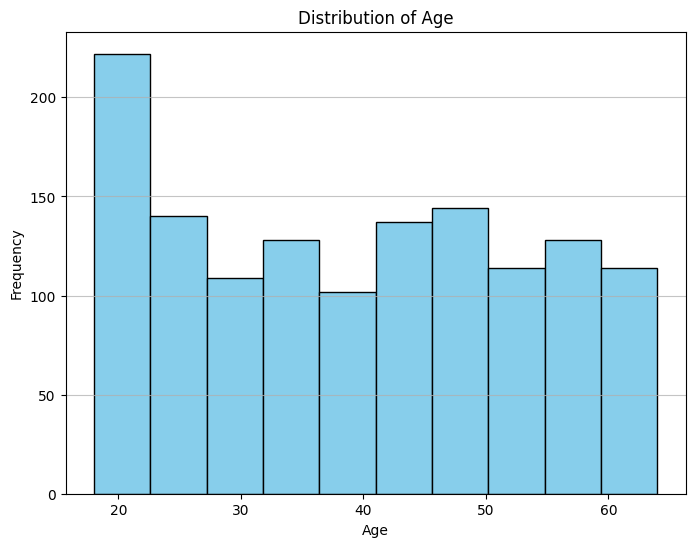

In [339]:
# Plot histogram usia
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [340]:
rata_rata_umur = df['age'].mean()
print(f"Rata-rata Umur: {rata_rata_umur}")

Rata-rata Umur: 39.20702541106129


## Sex

Distribusi Sex:
sex
male      676
female    662
Name: count, dtype: int64


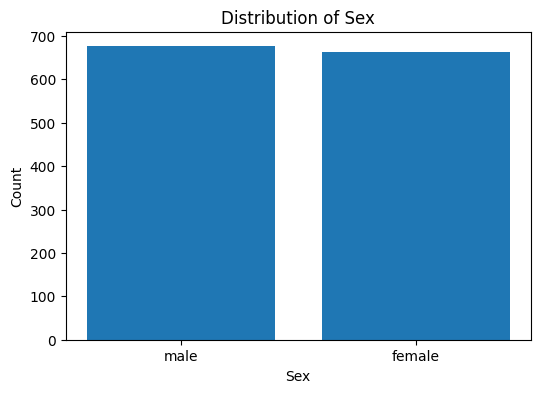

In [341]:
# Melihat distribusi sex
sex_distribution = df['sex'].value_counts()
print("Distribusi Sex:")
print(sex_distribution)

# Plot distribusi sex
plt.figure(figsize=(6, 4))
plt.bar(sex_distribution.index, sex_distribution.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()


## BMI

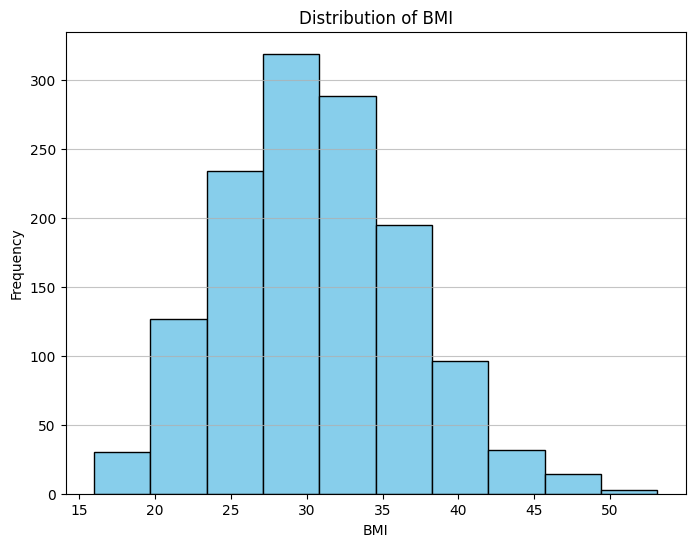

In [342]:
# Plot histogram BMI
plt.figure(figsize=(8, 6))
plt.hist(df['bmi'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.grid(axis='y', alpha=0.75)
plt.show()

## charges

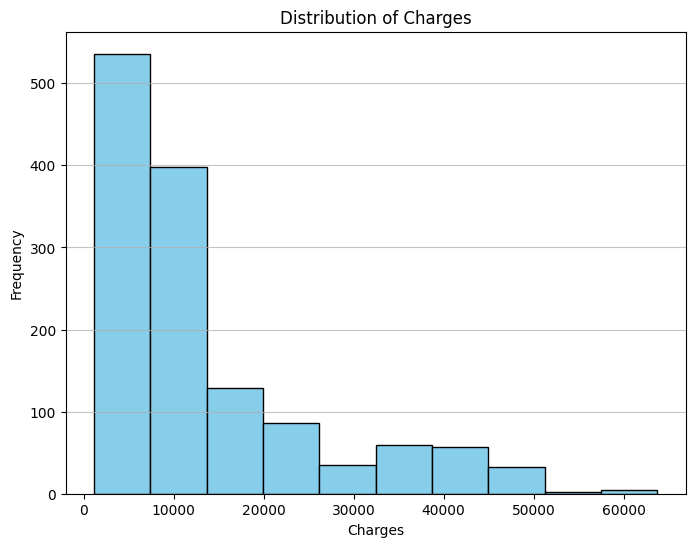

In [343]:
# Plot histogram charges
plt.figure(figsize=(8, 6))
plt.hist(df['charges'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')
plt.grid(axis='y', alpha=0.75)
plt.show()

pembagian kategori charges berdasarkan kuartil:

* Low Charges (Biaya Rendah): Charges < Q1
* Medium Charges (Biaya Sedang): Q1 <= Charges < Q3
* High Charges (Biaya Tinggi): Charges >= Q3

In [344]:
import numpy as np

# Menghitung kuartil Q1 dan Q3
Q1 = np.percentile(df['charges'], 25)
Q3 = np.percentile(df['charges'], 75)

# Membuat kategori charges
df['charges_category'] = pd.cut(df['charges'], bins=[float('-inf'), Q1, Q3, float('inf')], labels=['Low Charges', 'Medium Charges', 'High Charges'])

# Menampilkan hasil
print(df[['charges', 'charges_category']])


          charges charges_category
0     16884.92400     High Charges
1      1725.55230      Low Charges
2      4449.46200      Low Charges
3     21984.47061     High Charges
4      3866.85520      Low Charges
...           ...              ...
1333  10600.54830   Medium Charges
1334   2205.98080      Low Charges
1335   1629.83350      Low Charges
1336   2007.94500      Low Charges
1337  29141.36030     High Charges

[1338 rows x 2 columns]


# 1. Descriptive Statistic

## Eksplorasi data awal tagihan kesehatan
1. Berapa rata rata umur pada data tersebut?
2. Berapa rata rata nilai BMI dari yang merokok?
3. Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?
4. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?
5. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?
6. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25
atau non perokok yang BMI nya diatas 25 (overweight)
7. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [345]:
from scipy.stats import norm
# Estimasi parameter distribusi normal untuk 'age'
mu_age, std_age = norm.fit(df['age'])
print(f"Estimasi rata-rata umur (mu) adalah {mu_age:.2f}, dan deviasi standarnya (sigma) adalah {std_age:.2f}")

# Estimasi parameter distribusi normal untuk 'bmi'
mu_bmi, std_bmi = norm.fit(df['bmi'])
print(f"Estimasi rata-rata BMI (mu) adalah {mu_bmi:.2f}, dan deviasi standarnya (sigma) adalah {std_bmi:.2f}")

# Estimasi parameter distribusi normal untuk 'charges'
mu_charges, std_charges = norm.fit(df['charges'])
print(f"Estimasi rata-rata biaya (mu) adalah {mu_charges:.2f}, dan deviasi standarnya (sigma) adalah {std_charges:.2f}")

Estimasi rata-rata umur (mu) adalah 39.21, dan deviasi standarnya (sigma) adalah 14.04
Estimasi rata-rata BMI (mu) adalah 30.66, dan deviasi standarnya (sigma) adalah 6.10
Estimasi rata-rata biaya (mu) adalah 13270.42, dan deviasi standarnya (sigma) adalah 12105.48


## **rata-rata nilai BMI dari yang merokok dan kategorinya**

In [346]:
# Membuat kategori BMI
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

# Menampilkan hasil
print(df[['bmi', 'bmi_category']])

         bmi bmi_category
0     27.900   Overweight
1     33.770        Obese
2     33.000        Obese
3     22.705       Normal
4     28.880   Overweight
...      ...          ...
1333  30.970        Obese
1334  31.920        Obese
1335  36.850        Obese
1336  25.800   Overweight
1337  29.070   Overweight

[1338 rows x 2 columns]


In [347]:
# Rata-rata nilai BMI dari yang merokok
# Filter data untuk hanya mengandung informasi perokok
df_smoker = df[df['smoker'] == 'yes']

# Hitung rata-rata nilai BMI dari data perokok
rata_rata_bmi_perokok = df_smoker['bmi'].mean()
print(f"Rata-rata BMI dari yang merokok: {rata_rata_bmi_perokok}")


Rata-rata BMI dari yang merokok: 30.70844890510949


dari code diatas rata-rata bmi dari perokok dapat dikategorikan sebagai obese

## **variansi dari tagihan kesehatan perokok dan non perokok**

In [348]:
# Variansi charges untuk perokok
variasi_charges_perokok = df[df['smoker'] == 'yes']['charges'].var()
print(f"Variansi tagihan kesehatan untuk perokok: {variasi_charges_perokok}")

# Variansi charges untuk bukan perokok
variasi_charges_non_perokok = df[df['smoker'] == 'no']['charges'].var()
print(f"Variansi tagihan kesehatan untuk non-perokok: {variasi_charges_non_perokok}")


Variansi tagihan kesehatan untuk perokok: 133207311.20634924
Variansi tagihan kesehatan untuk non-perokok: 35925420.496111736


In [349]:
from scipy import stats

# Uji F untuk perbandingan variansi
f_stat, p_value = stats.f_oneway(df[df['smoker'] == 'yes']['charges'], df[df['smoker'] == 'no']['charges'])

# Menampilkan perbedaan varians dan hasil uji F
print(f"Perbedaan variansi: {abs(variasi_charges_perokok - variasi_charges_non_perokok)}")
print(f"Hasil Uji F: p-value = {p_value}")


Perbedaan variansi: 97281890.7102375
Hasil Uji F: p-value = 8.271435842182967e-283


nilai p-value rendah (< 0.05), kita dapat menolak hipotesis nol dan menyimpulkan bahwa variansi dari tagihan kesehatan perokok dan non-perokok tidak sama.







## **rata rata umur perempuan dan laki-laki yang merokok**

In [350]:
from scipy import stats

# Rata-rata umur perempuan yang merokok
rata_umur_perempuan = df[(df['smoker'] == 'yes') & (df['sex'] == 'female')]['age'].mean()

# Rata-rata umur laki-laki yang merokok
rata_umur_laki_laki = df[(df['smoker'] == 'yes') & (df['sex'] == 'male')]['age'].mean()

# Uji t untuk dua sampel independen
t_stat, p_value = stats.ttest_ind(df[(df['smoker'] == 'yes') & (df['sex'] == 'female')]['age'],
                                   df[(df['smoker'] == 'yes') & (df['sex'] == 'male')]['age'])

# Menampilkan hasil
print(f"Rata-rata umur perempuan yang merokok: {rata_umur_perempuan}")
print(f"Rata-rata umur laki-laki yang merokok: {rata_umur_laki_laki}")
print(f"Hasil Uji t: p-value = {p_value}")


Rata-rata umur perempuan yang merokok: 38.608695652173914
Rata-rata umur laki-laki yang merokok: 38.44654088050314
Hasil Uji t: p-value = 0.9244108005609346



Dari hasil uji t yang dilakukan, nilai p-value sebesar 0.9244108005609346 yang lebih besar dari tingkat signifikansi(0.05), kita tidak memiliki cukup bukti untuk menolak hipotesis null. Oleh karena itu, tidak dapat disimpulkan bahwa rata-rata umur perempuan yang merokok sama dengan rata-rata umur laki-laki yang merokok. Dengan kata lain, berdasarkan data yang tersedia, tidak ada perbedaan yang signifikan dalam rata-rata umur antara perempuan dan laki-laki yang merokok.






## **rata rata tagihan kesehatan perokok dan non merokok**

In [351]:
# Rata-rata tagihan kesehatan perokok
rata_rata_charges_perokok = df[df['smoker'] == 'yes']['charges'].mean()
print(f"Rata-rata tagihan kesehatan perokok: {rata_rata_charges_perokok}")

# Rata-rata tagihan kesehatan non-perokok
rata_rata_charges_non_perokok = df[df['smoker'] == 'no']['charges'].mean()
print(f"Rata-rata tagihan kesehatan non-perokok: {rata_rata_charges_non_perokok}")


Rata-rata tagihan kesehatan perokok: 32050.23183153284
Rata-rata tagihan kesehatan non-perokok: 8434.268297856204


Hasil menunjukkan rata-rata tagihan kesehatan perokok lebih tinggi daripada non-perokok

# **rata rata tagihan kesehatan perokok yang BMI nya diatas 25**


In [352]:
# Rata-rata tagihan kesehatan perokok dengan BMI di atas 25
rata_rata_charges_perokok_bmi_tinggi = df[(df['smoker'] == 'yes') & (df['bmi'] > 25)]['charges'].mean()
print(f"Rata-rata tagihan kesehatan perokok dengan BMI di atas 25: {rata_rata_charges_perokok_bmi_tinggi}")

# Rata-rata tagihan kesehatan non-perokok dengan BMI di atas 25
rata_rata_charges_non_perokok_bmi_tinggi = df[(df['smoker'] == 'no') & (df['bmi'] > 25)]['charges'].mean()
print(f"Rata-rata tagihan kesehatan non-perokok dengan BMI di atas 25: {rata_rata_charges_non_perokok_bmi_tinggi}")


Rata-rata tagihan kesehatan perokok dengan BMI di atas 25: 35116.90965694064
Rata-rata tagihan kesehatan non-perokok dengan BMI di atas 25: 8629.589609712157


dapat disimpulkan rata-rata tagihan kesehatan perokok dengan BMI diatas 25 lebih tinggi daripada non-perokok

# **Melihat BMI yang lebih tinggi, seseorang perokok atau non perokok**

In [353]:
# Rata-rata BMI perokok
rata_rata_bmi_perokok = df[df['smoker'] == 'yes']['bmi'].mean()

# Rata-rata BMI non-perokok
rata_rata_bmi_non_perokok = df[df['smoker'] == 'no']['bmi'].mean()

print(rata_rata_bmi_perokok)
print(rata_rata_bmi_non_perokok)
# Membandingkan rata-rata BMI
if rata_rata_bmi_perokok > rata_rata_bmi_non_perokok:
    print("Rata-rata BMI perokok lebih tinggi dari rata-rata BMI non-perokok.")
elif rata_rata_bmi_perokok < rata_rata_bmi_non_perokok:
    print("Rata-rata BMI non-perokok lebih tinggi dari rata-rata BMI perokok.")
else:
    print("Rata-rata BMI perokok sama dengan rata-rata BMI non-perokok.")


30.70844890510949
30.651795112781954
Rata-rata BMI perokok lebih tinggi dari rata-rata BMI non-perokok.


# 2. Analisa Peluang Variabel Diskrit

# **Gender yang memiliki tagihan paling tinggi**

In [354]:
# Menghitung rata-rata tagihan untuk setiap gender
rata_rata_tagihan_per_gender = df.groupby('sex')['charges'].mean()

# Menemukan gender dengan tagihan paling tinggi
gender_tagihan_tertinggi = rata_rata_tagihan_per_gender.idxmax()
tagihan_tertinggi = rata_rata_tagihan_per_gender.max()

# Menampilkan nilai rata-rata tagihan tertinggi untuk masing-masing gender
rata_rata_tagihan_tertinggi_male = df[df['sex'] == 'male']['charges'].mean()
rata_rata_tagihan_tertinggi_female = df[df['sex'] == 'female']['charges'].mean()

print(f"Gender dengan tagihan paling tinggi adalah {gender_tagihan_tertinggi} dengan rata-rata tagihan sebesar {tagihan_tertinggi}")
print(f"Rata-rata tagihan tertinggi untuk male: {rata_rata_tagihan_tertinggi_male}")
print(f"Rata-rata tagihan tertinggi untuk female: {rata_rata_tagihan_tertinggi_female}")


Gender dengan tagihan paling tinggi adalah male dengan rata-rata tagihan sebesar 13956.751177721893
Rata-rata tagihan tertinggi untuk male: 13956.751177721893
Rata-rata tagihan tertinggi untuk female: 12569.578843835347


3. Apakah setiap region memiliki proporsi data banyak orang yang sama?
4. Mana yang lebih tinggi proporsi perokok atau non perokok?
5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
7. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

# **distribusi peluang tagihan di tiap-tiap region**

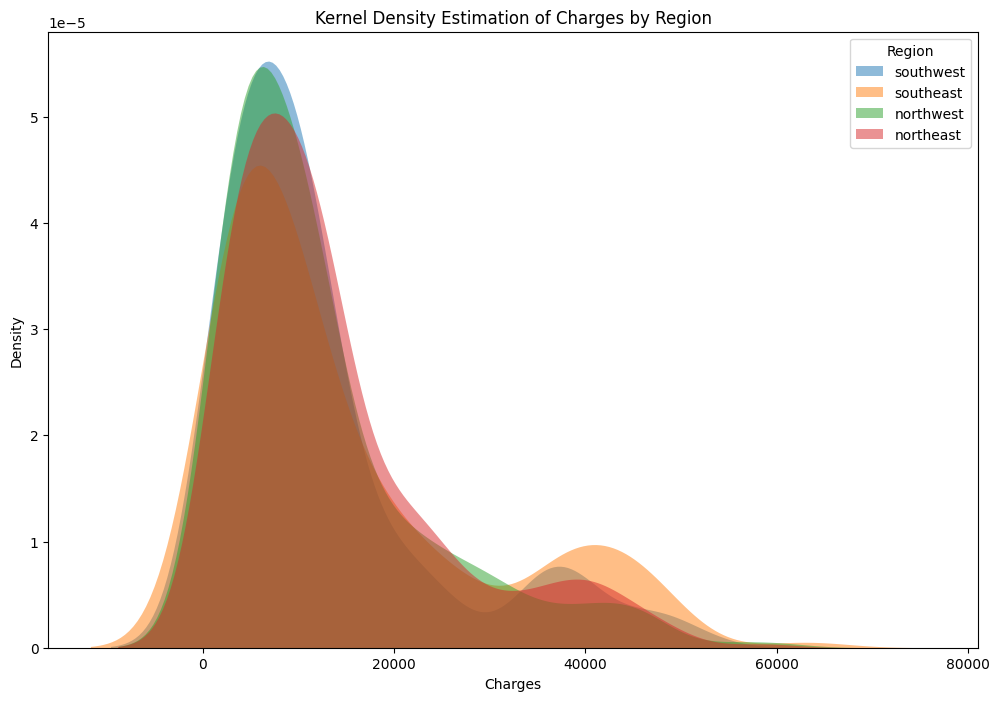

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat KDE plot untuk distribusi tagihan di tiap region
plt.figure(figsize=(12, 8))
for region in df['region'].unique():
    sns.kdeplot(data=df[df['region'] == region], x='charges', label=region, fill=True, common_norm=False, alpha=0.5, linewidth=0)

plt.xlabel('Charges')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Charges by Region')
plt.legend(title='Region')
plt.show()


# **proporsi perokok dan non-perokok**

In [356]:
# Hitung jumlah perokok dan non-perokok
smoker_count = len(df[df['smoker'] == 'yes'])
non_smoker_count = len(df[df['smoker'] == 'no'])

# Hitung proporsi perokok dan non-perokok
total_count = len(df)
smoker_proportion = smoker_count / total_count
non_smoker_proportion = non_smoker_count / total_count

# Tampilkan proporsi perokok dan non-perokok
print("Proporsi perokok:", smoker_proportion)
print("Proporsi non-perokok:", non_smoker_proportion)

# Bandingkan proporsi perokok dan non-perokok
if smoker_proportion > non_smoker_proportion:
    print("Proporsi perokok lebih tinggi.")
else:
    print("Proporsi non-perokok lebih tinggi.")


Proporsi perokok: 0.20478325859491778
Proporsi non-perokok: 0.7952167414050823
Proporsi non-perokok lebih tinggi.


# **peluang seseorang tersebut adalah perempuan dan laki-laki diketahui dia adalah perokok**

In [357]:
# Hitung jumlah perempuan perokok
female_smoker_count = len(df[(df['sex'] == 'female') & (df['smoker'] == 'yes')])

# Hitung total jumlah perokok
total_smoker_count = len(df[df['smoker'] == 'yes'])

# Hitung probabilitas seseorang adalah perempuan jika diketahui dia adalah perokok
probability_female_given_smoker = female_smoker_count / total_smoker_count

# Tampilkan hasil
print("Peluang seseorang adalah perempuan jika diketahui dia adalah perokok:", probability_female_given_smoker)


Peluang seseorang adalah perempuan jika diketahui dia adalah perokok: 0.4197080291970803


In [358]:
# Hitung jumlah perempuan perokok
male_smoker_count = len(df[(df['sex'] == 'male') & (df['smoker'] == 'yes')])

# Hitung total jumlah perokok
total_smoker_count = len(df[df['smoker'] == 'yes'])

# Hitung probabilitas seseorang adalah perempuan jika diketahui dia adalah perokok
probability_male_given_smoker = male_smoker_count / total_smoker_count

# Tampilkan hasil
print("Peluang seseorang adalah pria jika diketahui dia adalah perokok:", probability_male_given_smoker)


Peluang seseorang adalah pria jika diketahui dia adalah perokok: 0.5802919708029197


# 3. Analisa Peluang Variabel Kontinu

# **kemungkinan BMI di atas 25 dan dibawah 25 dengan tagihan di atas 16.7k**

In [360]:
# Hitung jumlah orang dengan BMI di atas 25 dan di bawah 25
above_25 = df[df['bmi'] > 25]
below_25 = df[df['bmi'] <= 25]

# Hitung berapa banyak dari masing-masing grup yang mendapatkan tagihan di atas 16.7k
above_25_high_charges = len(above_25[above_25['charges'] > 16700])
below_25_high_charges = len(below_25[below_25['charges'] > 16700])

# Hitung total jumlah orang di masing-masing grup
total_above_25 = len(above_25)
total_below_25 = len(below_25)

# Hitung probabilitas masing-masing situasi terjadi
prob_above_25_high_charges = above_25_high_charges / total_above_25
prob_below_25_high_charges = below_25_high_charges / total_below_25

print("Probabilitas seseorang dengan BMI di atas 25 mendapatkan tagihan di atas 16.7k:", prob_above_25_high_charges)
print("Probabilitas seseorang dengan BMI di bawah 25 mendapatkan tagihan di atas 16.7k:", prob_below_25_high_charges)

# Bandingkan probabilitas
if prob_above_25_high_charges > prob_below_25_high_charges:
    print("Lebih mungkin terjadi: Seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k")
else:
    print("Lebih mungkin terjadi: Seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k")


Probabilitas seseorang dengan BMI di atas 25 mendapatkan tagihan di atas 16.7k: 0.25939505041246563
Probabilitas seseorang dengan BMI di bawah 25 mendapatkan tagihan di atas 16.7k: 0.20647773279352227
Lebih mungkin terjadi: Seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k


In [361]:
# Menampilkan hasil perhitungan
print("Jumlah orang dengan BMI di atas 25:", total_above_25)
print("Jumlah orang dengan BMI di bawah atau sama dengan 25:", total_below_25)
print("Jumlah orang dengan BMI di atas 25 dan mendapatkan tagihan di atas 16.7k:", above_25_high_charges)
print("Jumlah orang dengan BMI di bawah atau sama dengan 25 dan mendapatkan tagihan di atas 16.7k:", below_25_high_charges)
print("Probabilitas seseorang dengan BMI di atas 25 mendapatkan tagihan di atas 16.7k:", prob_above_25_high_charges)
print("Probabilitas seseorang dengan BMI di bawah atau sama dengan 25 mendapatkan tagihan di atas 16.7k:", prob_below_25_high_charges)

Jumlah orang dengan BMI di atas 25: 1091
Jumlah orang dengan BMI di bawah atau sama dengan 25: 247
Jumlah orang dengan BMI di atas 25 dan mendapatkan tagihan di atas 16.7k: 283
Jumlah orang dengan BMI di bawah atau sama dengan 25 dan mendapatkan tagihan di atas 16.7k: 51
Probabilitas seseorang dengan BMI di atas 25 mendapatkan tagihan di atas 16.7k: 0.25939505041246563
Probabilitas seseorang dengan BMI di bawah atau sama dengan 25 mendapatkan tagihan di atas 16.7k: 0.20647773279352227


# **Perokok dan non perokok dengan bmi diatas 25 mendapat tagihan sebesar 16.7k**

In [362]:
# Hitung jumlah orang perokok dan non-perokok dengan BMI di atas 25
smokers_above_25 = df[(df['smoker'] == 'yes') & (df['bmi'] > 25)]
non_smokers_above_25 = df[(df['smoker'] == 'no') & (df['bmi'] > 25)]

# Hitung berapa banyak dari masing-masing grup yang mendapatkan tagihan di atas 16.7k
smokers_above_25_high_charges = len(smokers_above_25[smokers_above_25['charges'] > 16700])
non_smokers_above_25_high_charges = len(non_smokers_above_25[non_smokers_above_25['charges'] > 16700])

# Hitung total jumlah orang di masing-masing grup
total_smokers_above_25 = len(smokers_above_25)
total_non_smokers_above_25 = len(non_smokers_above_25)

# Hitung probabilitas masing-masing situasi terjadi
prob_smokers_above_25_high_charges = smokers_above_25_high_charges / total_smokers_above_25
prob_non_smokers_above_25_high_charges = non_smokers_above_25_high_charges / total_non_smokers_above_25

# Menampilkan hasil perhitungan
print("Probabilitas seseorang perokok dengan BMI di atas 25 mendapatkan tagihan di atas 16.7k:", prob_smokers_above_25_high_charges)
print("Probabilitas seseorang non-perokok dengan BMI di atas 25 mendapatkan tagihan di atas 16.7k:", prob_non_smokers_above_25_high_charges)

# Bandingkan probabilitas
if prob_smokers_above_25_high_charges > prob_non_smokers_above_25_high_charges:
    print("Lebih mungkin terjadi: Seseorang perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k")
else:
    print("Lebih mungkin terjadi: Seseorang non-perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k")


Probabilitas seseorang perokok dengan BMI di atas 25 mendapatkan tagihan di atas 16.7k: 0.9817351598173516
Probabilitas seseorang non-perokok dengan BMI di atas 25 mendapatkan tagihan di atas 16.7k: 0.0779816513761468
Lebih mungkin terjadi: Seseorang perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k


# 4. Analisa Korelasi Variabel

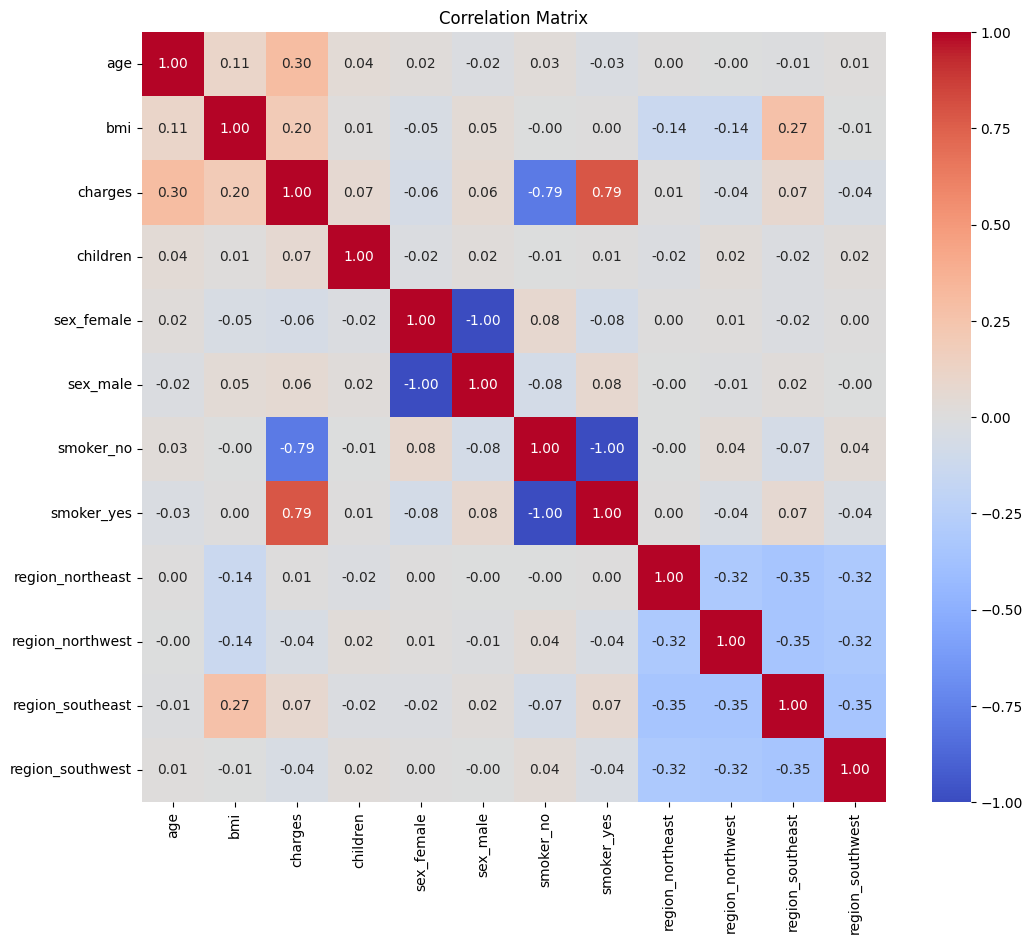

In [363]:
# Encode variabel diskrit
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

# Menghitung korelasi menggunakan metode Pearson
corr = df_encoded[['age', 'bmi', 'charges', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
                    'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].corr()

# Menyajikan hasil korelasi dalam bentuk heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

dari matriks ini, dapat dilihat bahwa terdapat korelasi positif/pengaruh yang cukup besar antara tagihan kesehatan dan perokok (korelasi 0.79) yang menunjukkan perokok cenderung memiliki biaya yang lebih tinggi

# 4. Uji Hipotesis

1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
2. Proporsi perokok laki laki lebih besar dari perempuan
3. Variansi tagihan kesehatan perokok dan non perokok sama
4. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan
dengan BMI dibawah 25
5. Tagihan kesehatan laki-laki lebih besar dari perempuan

# **uji hipotesis tagihan perokok dan non perokok**

In [364]:
from scipy import stats

# Pisahkan data tagihan kesehatan untuk perokok dan non-perokok
charges_smoker = df[df['smoker'] == 'yes']['charges']
charges_non_smoker = df[df['smoker'] == 'no']['charges']

# Lakukan uji t
t_stat, p_value = stats.ttest_ind(charges_smoker, charges_non_smoker, equal_var=False)

# Tentukan tingkat signifikansi
alpha = 0.05

# Tampilkan hasil uji
print(f"Nilai t-statistic: {t_stat:.4f}")
print(f"Nilai p-value: {p_value:.4f}")

if p_value < alpha:
    print("menolak hipotesis nol, ada bukti yang cukup bahwa tagihan kesehatan untuk perokok lebih tinggi daripada non-perokok.")
else:
    print("gagal menolak hipotesis nol, tidak ada bukti yang cukup bahwa tagihan kesehatan untuk perokok lebih tinggi daripada non-perokok.")


Nilai t-statistic: 32.7519
Nilai p-value: 0.0000
menolak hipotesis nol, ada bukti yang cukup bahwa tagihan kesehatan untuk perokok lebih tinggi daripada non-perokok.


# **Proporsi perokok laki laki lebih besar dari perempuan**

In [365]:
from statsmodels.stats.proportion import proportions_ztest

# Hitung jumlah perokok pria dan wanita
male_smokers = df[(df['sex'] == 'male') & (df['smoker'] == 'yes')].shape[0]
female_smokers = df[(df['sex'] == 'female') & (df['smoker'] == 'yes')].shape[0]

# Hitung jumlah total pria dan wanita
total_males = df[df['sex'] == 'male'].shape[0]
total_females = df[df['sex'] == 'female'].shape[0]

# Hitung proporsi perokok pria dan wanita
prop_male_smokers = male_smokers / total_males
prop_female_smokers = female_smokers / total_females

# Hitung selisih proporsi
prop_diff = prop_male_smokers - prop_female_smokers

# Lakukan uji z-proporsi
z_stat, p_value = proportions_ztest([male_smokers, female_smokers], [total_males, total_females])

# Tentukan tingkat signifikansi alpha
alpha = 0.05

# Tampilkan hasil uji
print(f"Proporsi perokok pria: {prop_male_smokers:.4f}")
print(f"Proporsi perokok wanita: {prop_female_smokers:.4f}")
print(f"Selisih proporsi: {prop_diff:.4f}")
print(f"Nilai z-score: {z_stat:.4f}")
print(f"Nilai p-value: {p_value:.4f}")

if p_value < alpha:
    print("menolak hipotesis nol, proporsi perokok pria lebih besar dari proporsi perokok wanita.")
else:
    print("gagal menolak hipotesis nol, tidak ada bukti yang cukup bahwa proporsi perokok pria lebih besar dari proporsi perokok wanita.")


Proporsi perokok pria: 0.2352
Proporsi perokok wanita: 0.1737
Selisih proporsi: 0.0615
Nilai z-score: 2.7867
Nilai p-value: 0.0053
menolak hipotesis nol, proporsi perokok pria lebih besar dari proporsi perokok wanita.


# **Variansi tagihan kesehatan perokok dan non perokok sama**

In [366]:
from scipy.stats import levene

# Pisahkan data tagihan kesehatan untuk perokok dan non-perokok
charges_smoker = df[df['smoker'] == 'yes']['charges']
charges_non_smoker = df[df['smoker'] == 'no']['charges']

# Lakukan uji Levene
statistic, p_value = levene(charges_smoker, charges_non_smoker)

# Tentukan tingkat signifikansi alpha
alpha = 0.05

# Hitung varians
variance_smoker = np.var(charges_smoker)
variance_non_smoker = np.var(charges_non_smoker)

print(f"Varians tagihan kesehatan untuk perokok: {variance_smoker:.2f}")
print(f"Varians tagihan kesehatan untuk non-perokok: {variance_non_smoker:.2f}")

# Tampilkan hasil uji
print(f"Nilai uji Levene: {statistic:.4f}")
print(f"Nilai p-value: {p_value:.4f}")

if p_value < alpha:
    print("Kami menolak hipotesis nol, varians tagihan kesehatan perokok dan non-perokok tidak sama.")
else:
    print("Kami gagal menolak hipotesis nol, varians tagihan kesehatan perokok dan non-perokok sama.")


Varians tagihan kesehatan untuk perokok: 132721153.14
Varians tagihan kesehatan untuk non-perokok: 35891656.00
Nilai uji Levene: 332.6135
Nilai p-value: 0.0000
Kami menolak hipotesis nol, varians tagihan kesehatan perokok dan non-perokok tidak sama.


# **Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25**

In [367]:
from scipy.stats import ttest_ind

# Pisahkan data tagihan kesehatan untuk BMI di atas 25 dan di bawah 25
charges_bmi_above_25 = df[df['bmi'] > 25]['charges']
charges_bmi_below_25 = df[df['bmi'] < 25]['charges']

# Lakukan uji-t untuk dua sampel independen
t_statistic, p_value = ttest_ind(charges_bmi_above_25, charges_bmi_below_25, equal_var=False)

# Tentukan tingkat signifikansi alpha
alpha = 0.05

# Tampilkan hasil uji
print(f"Nilai t-statistic: {t_statistic:.4f}")
print(f"Nilai p-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat perbedaan yang signifikan dalam tagihan kesehatan antara individu dengan BMI di atas 25 dan di bawah 25.")
else:
    print("Tidak terdapat cukup bukti untuk menyatakan bahwa ada perbedaan signifikan dalam tagihan kesehatan antara individu dengan BMI di atas 25 dan di bawah 25.")


Nilai t-statistic: 5.9299
Nilai p-value: 0.0000
Terdapat perbedaan yang signifikan dalam tagihan kesehatan antara individu dengan BMI di atas 25 dan di bawah 25.


# **Tagihan kesehatan laki-laki lebih besar dari perempuan**

In [368]:
from scipy.stats import ttest_ind

# Pisahkan data tagihan kesehatan untuk laki-laki dan perempuan
charges_male = df[df['sex'] == 'male']['charges']
charges_female = df[df['sex'] == 'female']['charges']

# Lakukan uji-t untuk dua sampel independen
t_statistic, p_value = ttest_ind(charges_male, charges_female)

# Tentukan tingkat signifikansi alpha
alpha = 0.05

# Tampilkan hasil uji
print(f"Nilai t-statistic: {t_statistic:.4f}")
print(f"Nilai p-value: {p_value:.4f}")

if p_value < alpha:
    print("Menolak hipotesis nol: tagihan kesehatan untuk laki-laki lebih besar daripada untuk perempuan.")
else:
    print("Gagal menolak hipotesis nol: Tidak cukup bukti untuk menyatakan bahwa tagihan kesehatan untuk laki-laki lebih besar daripada untuk perempuan.")


Nilai t-statistic: 2.0975
Nilai p-value: 0.0361
Menolak hipotesis nol: tagihan kesehatan untuk laki-laki lebih besar daripada untuk perempuan.


# **KESIMPULAN**

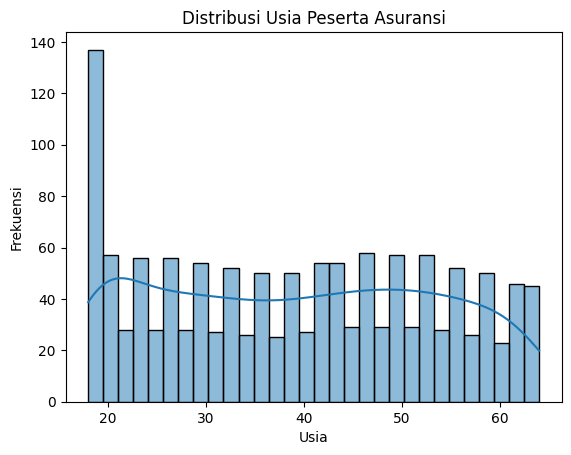

Statistik=0.945, p=0.000
Data tidak terdistribusi normal
              age   charges
age      1.000000  0.299008
charges  0.299008  1.000000


In [369]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analisis Distribusi Variabel Kontinu (contoh dengan variabel 'age')
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Distribusi Usia Peserta Asuransi')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

# Uji Normalitas (contoh dengan uji Shapiro-Wilk)
from scipy.stats import shapiro
stat, p = shapiro(df['age'])
print('Statistik=%.3f, p=%.3f' % (stat, p))
# Interpretasi
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

# Analisis Korelasi Variabel Kontinu (contoh dengan variabel 'age' dan 'charges')
correlation = df[['age', 'charges']].corr()
print(correlation)


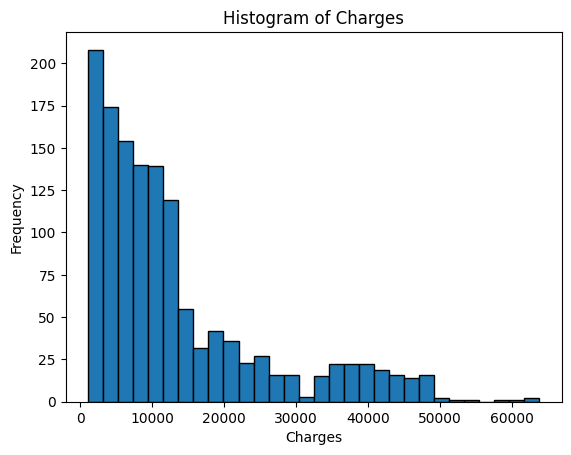

In [370]:
import matplotlib.pyplot as plt

plt.hist(df['charges'], bins=30, edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Charges')
plt.show()


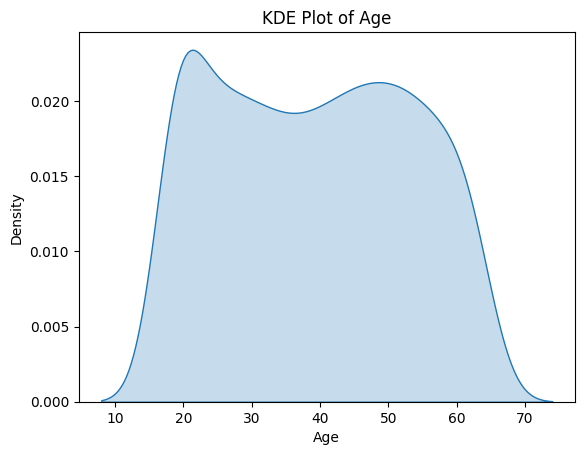

In [385]:
import seaborn as sns

sns.kdeplot(df['age'], fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age')
plt.show()

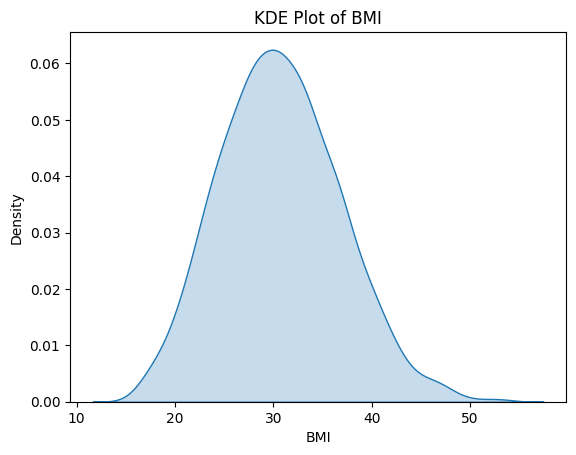

In [388]:
import seaborn as sns

sns.kdeplot(df['bmi'], fill=True)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('KDE Plot of BMI')
plt.show()

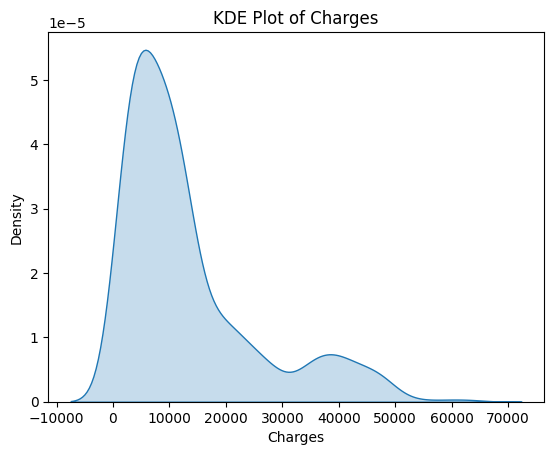

In [386]:
import seaborn as sns

sns.kdeplot(df['charges'], fill=True)
plt.xlabel('Charges')
plt.ylabel('Density')
plt.title('KDE Plot of Charges')
plt.show()


In [372]:
from scipy.stats import shapiro

stat, p = shapiro(df['charges'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.815, p=0.000
Sample does not look Gaussian (reject H0)


In [382]:
import pandas as pd
from scipy.stats import shapiro

# Variabel yang ingin kita tes
variables = ['age', 'bmi', 'charges']

# Melakukan tes Shapiro-Wilk untuk setiap variabel
for var in variables:
    stat, p = shapiro(df[var])
    print(f'\nTes Shapiro-Wilk untuk {var}:')
    print(f'Statistik W: {stat}')
    print(f'p-value: {p}')
    if p > 0.05:
        print(f'{var}  berdistribusi normal.')
    else:
        print(f'{var}  tidak berdistribusi normal.')



Tes Shapiro-Wilk untuk age:
Statistik W: 0.9446989893913269
p-value: 5.687060076887153e-22
age  tidak berdistribusi normal.

Tes Shapiro-Wilk untuk bmi:
Statistik W: 0.9938861727714539
p-value: 2.6033414542325772e-05
bmi  tidak berdistribusi normal.

Tes Shapiro-Wilk untuk charges:
Statistik W: 0.8146880865097046
p-value: 1.1505194006561963e-36
charges  tidak berdistribusi normal.


In [383]:
import numpy as np
from scipy import stats

# Variabel yang ingin kita transformasi
variables = ['age', 'bmi', 'charges']

# Melakukan transformasi untuk setiap variabel
for var in variables:

    # Transformasi Box-Cox
    df[var+'_boxcox'], _ = stats.boxcox(df[var])

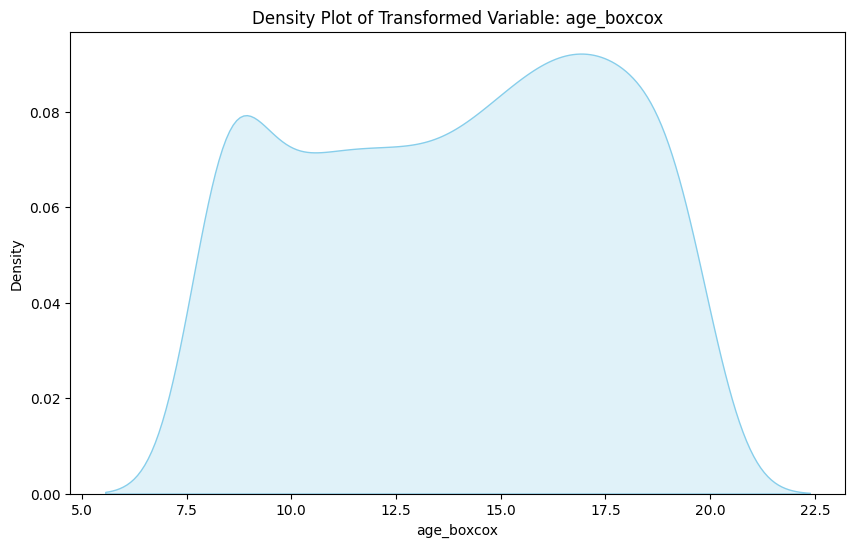

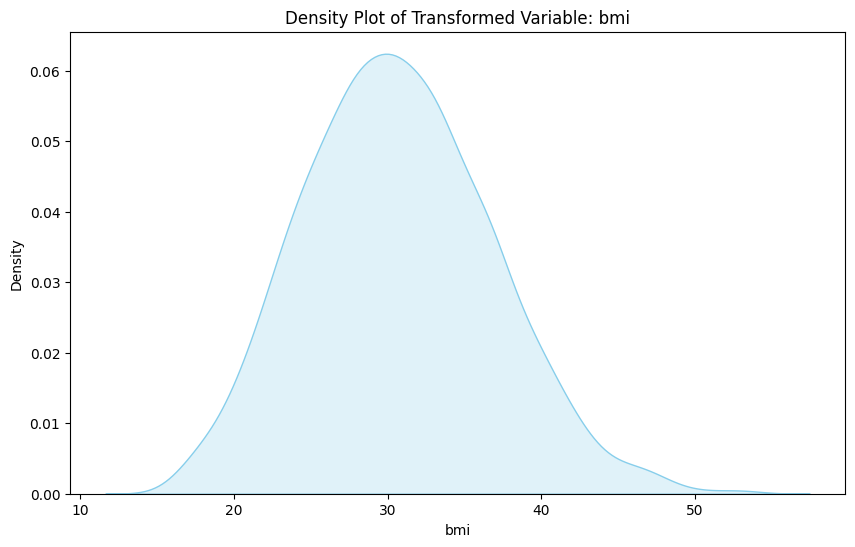

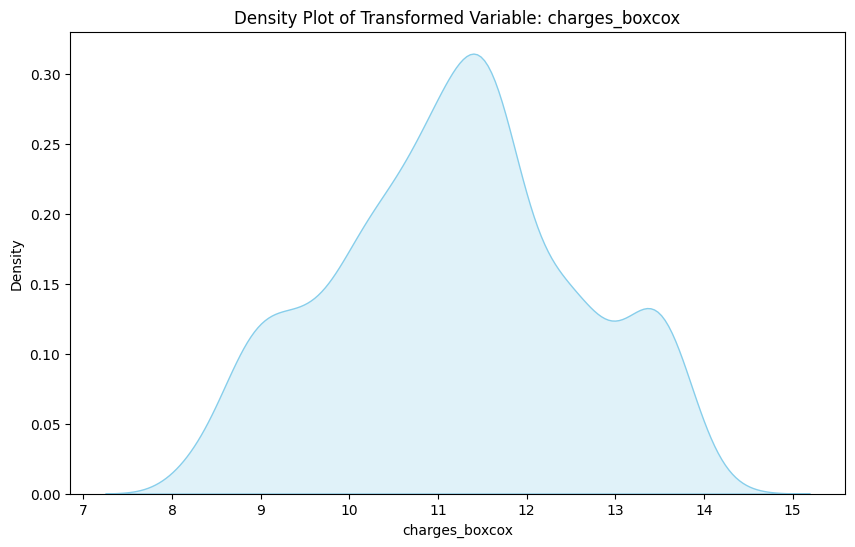

In [389]:
import seaborn as sns

# Variabel yang telah kita transformasi menggunakan Box-Cox
transformed_variables = ['age_boxcox','bmi','charges_boxcox']

# Membuat plot untuk setiap variabel
for var in transformed_variables:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[var], color='skyblue', fill=True)
    plt.title(f'Density Plot of Transformed Variable: {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.show()


In [377]:
# Menghitung rata-rata biaya asuransi
mean_charges = df['charges'].mean()

# Menghitung probabilitas kondisional
condition = (df['smoker'] == 'yes')
prob = (df[condition]['charges'] > mean_charges).mean()

print(f'Probabilitas bahwa biaya asuransi berada di atas rata-rata, dengan asumsi bahwa individu adalah perokok, adalah {prob}')


Probabilitas bahwa biaya asuransi berada di atas rata-rata, dengan asumsi bahwa individu adalah perokok, adalah 0.9963503649635036


In [380]:
# Menghitung rata-rata untuk setiap variabel
mean_age = df['age_boxcox'].mean()
mean_charges = df['charges_boxcox'].mean()

# Menghitung probabilitas kondisional
condition = (df['charges_boxcox'] > mean_charges)
prob = (df[condition]['age_boxcox'] < mean_age).mean()

print(f'Probabilitas bahwa usia berada di bawah rata-rata, dengan asumsi bahwa biaya asuransi berada di atas rata-rata, adalah {prob}')


Probabilitas bahwa usia berada di bawah rata-rata, dengan asumsi bahwa biaya asuransi berada di atas rata-rata, adalah 0.2696793002915452


In [381]:
# Menghitung rata-rata untuk setiap variabel
mean_age = df['age_boxcox'].mean()
mean_charges = df['charges_boxcox'].mean()

# Menghitung probabilitas kondisional
condition = (df['charges_boxcox'] < mean_charges)
prob = (df[condition]['age_boxcox'] < mean_age).mean()

print(f'Probabilitas bahwa usia berada di bawah rata-rata, dengan asumsi bahwa biaya asuransi juga berada di bawah rata-rata, adalah {prob}')


Probabilitas bahwa usia berada di bawah rata-rata, dengan asumsi bahwa biaya asuransi juga berada di bawah rata-rata, adalah 0.7116564417177914
